In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np


from src.utils import load_data, load_config, load_merged_features
from src import utils_stats as us
from src.utils_mca import compute_mca

import seaborn as sns

/home/robin/env/violent_men/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Data Exploration

In [2]:
config = load_config("config.yaml")

data = load_merged_features(config)
data = data.replace(["MANQUANT"], 0)
data = data.replace([np.inf, -np.inf], 0)
#data = data.dropna()
data['ABS_PRE_DISSOCIATION'] = data['ABS_PRE_DISSOCIATION'].apply(int)
print(data.shape)

def diagnostic(x):
    
    if x.PTSD_33==1   and x.ABS_PRE_DISSOCIATION == 1:
        return 3
    elif x.PTSD_33 == 1 and x.ABS_PRE_DISSOCIATION == 0:
        return 2
    elif x.PTSD_33 == 0 and x.ABS_PRE_DISSOCIATION == 1:
        return 1
    else :
        return 0


data['DIAG_CAT'] = data.apply(lambda x : diagnostic(x),axis=1)

data['DIAG_CAT'].value_counts()

(57, 1136)


DIAG_CAT
0    24
3    18
1    13
2     2
Name: count, dtype: int64

In [144]:
text_source = "Q1"
text_features = data.filter(regex=f'{text_source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
text_features

for columns in text_features:
    neutral = columns.replace("Q1", "")
    new_column = f"avg_Q1_Q2_Q3{neutral}"
    data[new_column] = data[f'Q1{neutral}'] + data[f'Q2{neutral}'] + data[f'Q3{neutral}']
    data[new_column] = data[new_column] / 3
    

/tmp/ipykernel_1687078/178135806.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_column] = data[f'Q1{neutral}'] + data[f'Q2{neutral}'] + data[f'Q3{neutral}']
/tmp/ipykernel_1687078/178135806.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_column] = data[f'Q1{neutral}'] + data[f'Q2{neutral}'] + data[f'Q3{neutral}']
/tmp/ipykernel_1687078/178135806.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [147]:
text_features_avg = data.filter(regex=f'avg_.*').select_dtypes(include=['float', 'int']).columns.to_list()


,avg_Q1_Q2_Q3_count_sents,avg_Q1_Q2_Q3_passive_count,avg_Q1_Q2_Q3_passive_count_norm,avg_Q1_Q2_Q3_passive_sents_count,avg_Q1_Q2_Q3_passive_percentages,avg_Q1_Q2_Q3_binary,avg_Q1_Q2_Q3_number_of_nodes,avg_Q1_Q2_Q3_number_of_edges,avg_Q1_Q2_Q3_PE,avg_Q1_Q2_Q3_LCC,...,avg_Q1_Q2_Q3_score_paticules_matches,avg_Q1_Q2_Q3_score_troncations_matches,avg_Q1_Q2_Q3_score_onomatopes_matches,avg_Q1_Q2_Q3_silent_break,avg_Q1_Q2_Q3_filled_break,avg_Q1_Q2_Q3_incomplete_sentence,avg_Q1_Q2_Q3_incomplete_word,avg_Q1_Q2_Q3_long_vowell,avg_Q1_Q2_Q3_connecteur,avg_Q1_Q2_Q3_non_understandable
0,62.666667,2.333333,0.346614,2.333333,0.050967,1.000000,307.666667,1127.000000,126.666667,1.000000,...,3.904256,0.0,0.409695,1.061869,2.104620,0.382357,0.000000,0.085603,6.639272,0.0
1,90.000000,2.000000,0.290209,1.666667,0.025586,1.000000,322.000000,1255.333333,166.666667,1.000000,...,3.531752,0.0,0.119246,2.838498,2.273776,0.939404,0.099106,0.640052,4.906601,0.0
2,52.666667,2.000000,0.280250,2.000000,0.030653,0.666667,261.333333,876.000000,118.333333,1.000000,...,5.120208,0.0,0.058685,0.949606,3.838428,0.249821,0.433837,0.411762,7.256927,0.0
3,52.333333,1.666667,0.253668,1.666667,0.032214,1.000000,244.000000,714.666667,85.000000,1.000000,...,1.703675,0.0,0.000000,0.721054,1.164641,0.212750,0.156821,0.117886,5.685818,0.0
4,24.000000,0.666667,0.107444,0.666667,0.020041,0.666667,135.666667,339.333333,39.333333,1.000000,...,1.610282,0.0,0.063857,0.191571,2.270319,0.198636,0.000000,0.063857,4.568082,0.0
5,38.666667,0.666667,0.098618,0.666667,0.015226,0.666667,205.666667,672.666667,92.666667,1.000000,...,1.882365,0.0,0.172840,0.074074,0.952806,1.357302,0.000000,0.164127,3.514927,0.0
6,67.333333,1.000000,0.144129,1.000000,0.014482,0.666667,207.666667,981.000000,140.333333,1.000000,...,4.865267,0.0,0.000000,0.112909,5.139152,0.388910,0.409384,0.955229,5.087198,0.0
7,23.666667,0.666667,0.112284,0.666667,0.024250,0.666667,130.333333,353.666667,36.000000,1.000000,...,5.839930,0.0,0.506938,2.366445,5.312225,0.374198,0.000000,0.766149,5.182498,0.0
8,27.333333,0.666667,0.111363,0.666667,0.028986,0.333333,145.333333,357.666667,40.666667,1.000000,...,6.268195,0.0,0.067751,1.709065,4.605959,0.346716,0.151503,0.000000,7.320752,0.0
9,62.666667,7.000000,0.958528,6.000000,0.119965,1.000000,412.666667,1482.333333,164.333333,1.000000,...,2.987293,0.0,0.016308,0.077796,1.647000,0.362601,0.000000,0.159118,5.137945,0.0


In [30]:
data.source

0     france
1     france
2     france
3     france
4     france
5     france
6     france
7     france
8     france
9     france
10    france
11    france
12    france
13    france
14    france
15    france
16    france
17    france
18    france
19    france
20    france
21    france
22    france
23    france
24    france
25    france
26    france
27    france
28    france
29    france
30    france
31    france
32    france
33    france
34    france
35    france
36    france
37    france
38    quebec
39    quebec
40    quebec
41    quebec
42    quebec
43    quebec
44    quebec
45    quebec
46    quebec
47    quebec
48    quebec
49    quebec
50    quebec
51    quebec
52    quebec
53    quebec
54    quebec
55    quebec
56    quebec
Name: source, dtype: object

In [36]:
data['TOTAL_DES_y']

0      280
1      490
2     1230
3      460
4      420
5      320
6      360
7      270
8      520
9      220
10    1010
11     600
12     350
13     180
14     440
15     220
16     200
17     210
18     260
19      40
20     420
21      50
22     430
23     260
24     130
25     860
26     230
27     780
28     820
29     260
30     300
31     410
32     430
33     380
34     240
35     150
36       0
37     220
38    2100
39    1590
40    1100
41    1400
42     310
43     490
44      70
45     140
46     510
47     650
48     100
49    1010
50     290
51     290
52    1280
53     160
54     830
55     540
56    1770
Name: TOTAL_DES_y, dtype: int64

Mean R^2: -0.14
Std R^2: 0.34


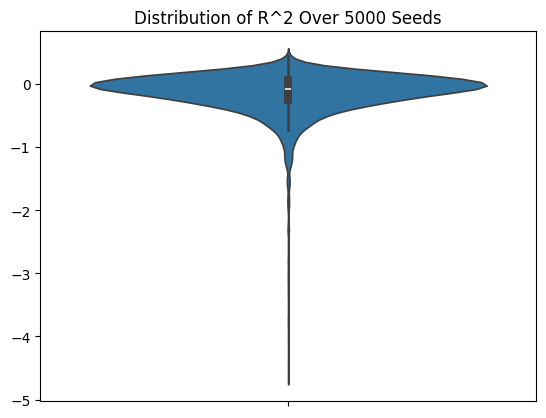

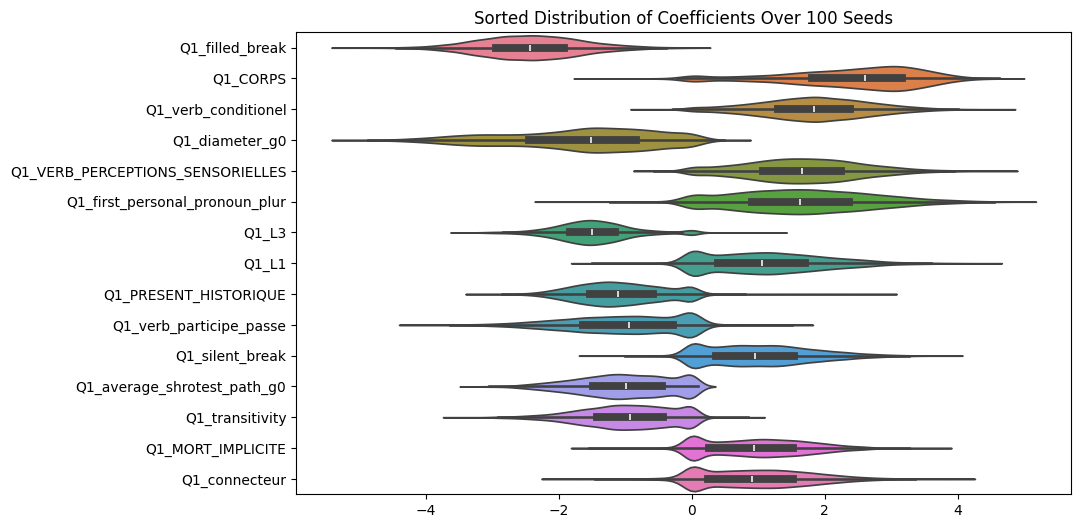

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupShuffleSplit, StratifiedShuffleSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet

data['random'] = np.random.rand(data.shape[0])
data['random_group'] = np.random.randint(0, 2, data.shape[0])

features = ['Q1_silent_break',
 'Q1_filled_break',
 'Q1_incomplete_sentence',
 'Q1_incomplete_word',
 'Q1_long_vowell',
 'Q1_connecteur',
 'Q1_non_understandable'] +['Q1_MORT_IMPLICITE',
 'Q1_MORT_EXPLICITE',
 'Q1_ON_GENERIQUE',
 #'Q1_ON_NOUS',
 'Q1_ON_QUELQU_UN',
 'Q1_PRESENT_ENNONCIATION',
 'Q1_PRESENT_GENERIQUE',
 'Q1_PRESENT_HISTORIQUE',
 'Q1_VERB_PERCEPTIONS_SENSORIELLES',
 'Q1_CORPS',
 'Q1_NOM_PERCEPTIONS_SENSORIELLES',
 'Q1_SENSATIONS_PHYSIQUES',] + ['Q1_first_personal_pronoun_sing',
 'Q1_first_personal_pronoun_plur',
 'Q1_second_personal_pronoun',
 'Q1_third_personal_pronoun',
 'Q1_verb_indicatif_present',
 'Q1_verb_indicatif_future',
 'Q1_verb_participe_passe',
 'Q1_verb_conditionel',
 'Q1_verb_indicatif_imparfait'] + ['Q1_PE',
 'Q1_LCC',
 'Q1_LSC',
 'Q1_degree_average',
 'Q1_degree_std',
 'Q1_L1',
 'Q1_L2',
 'Q1_L3',
 'Q1_transitivity',
 'Q1_average_clustering',
 'Q1_diameter_g0',
 'Q1_average_shrotest_path_g0'] + [ 'Q1_passive_count_norm', 'Q1_passive_percentages',]
  #+#['random']

text_source = "Q1"
features = [x.replace('Q1_', text_source+'_') for x in features]

target = "TOTAL_PCL_y"
group_column = "random_group"
dataset = data#[data['TYPE_TRAUMA']==1]
dataset = dataset[features + [target] + [group_column]].fillna(0)

# Function to train model and return coefficients
def get_coefficients(seed, data, target, model, group_column=group_column):
    #sss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=seed)
    
    # Get indices for the first split with the provided group column
    #for train_idx, test_idx in sss.split(data, groups = data[group_column]):
    #    X_train, X_test = data.drop([target,group_column], axis=1).iloc[train_idx], data.drop([target,group_column], axis=1).iloc[test_idx]
    #    y_train, y_test = data[target].iloc[train_idx], data[target].iloc[test_idx]
    X_train, X_test, y_train, y_test = train_test_split(data.drop([target,group_column], axis=1), data[target], test_size=0.3, random_state=seed)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if model == 'linear':
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test) 
        return model.coef_, score
    elif model == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=seed)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        return model.feature_importances_, score
    elif model == 'ridge':
        model = Ridge(alpha=1.0)
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test)
        return model.coef_, score
    elif model == 'lasso':
        model = Lasso(alpha=1)
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test)
        return model.coef_, score
    elif model == 'elastic_net':
        model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=seed)
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test)
        return model.coef_, score

# Running the experiment over 100 different seeds
results = [get_coefficients(seed, dataset, target, model = 'elastic_net') for seed in range(5000)]
all_coefficients = np.array([result[0] for result in results])
scores = [result[1] for result in results if result[1] > -5]
print(f'Mean R^2: {np.mean(scores):.2f}')
print(f'Std R^2: {np.std(scores):.2f}')
sns.violinplot(scores)
plt.title('Distribution of R^2 Over 5000 Seeds')

# Calculate the average coefficients
average_coefficients = np.mean(all_coefficients, axis=0)

# Create a DataFrame for plotting
coeff_df = pd.DataFrame(all_coefficients, columns=dataset.columns[:-2])


# Sorting features by the average magnitude of coefficients
sorted_features = coeff_df.mean().abs().sort_values(ascending=False).index[:15]
sorted_coeff_df = coeff_df[sorted_features]

# Plotting sorted coefficients
plt.figure(figsize=(10, 6))
sns.violinplot(data=sorted_coeff_df, orient='h')
plt.title('Sorted Distribution of Coefficients Over 100 Seeds')
plt.show()

In [151]:
features = ['Q1_silent_break',
 'Q1_filled_break',
 'Q1_incomplete_sentence',
 'Q1_incomplete_word',
 'Q1_long_vowell',
 'Q1_connecteur',
 'Q1_non_understandable'] +['Q1_MORT_IMPLICITE',
 'Q1_MORT_EXPLICITE',
 'Q1_ON_GENERIQUE',
 #'Q1_ON_NOUS',
 'Q1_ON_QUELQU_UN',
 'Q1_PRESENT_ENNONCIATION',
 'Q1_PRESENT_GENERIQUE',
 'Q1_PRESENT_HISTORIQUE',
 'Q1_VERB_PERCEPTIONS_SENSORIELLES',
 'Q1_CORPS',
 'Q1_NOM_PERCEPTIONS_SENSORIELLES',
 'Q1_SENSATIONS_PHYSIQUES',] + ['Q1_first_personal_pronoun_sing',
 'Q1_first_personal_pronoun_plur',
 'Q1_second_personal_pronoun',
 'Q1_third_personal_pronoun',
 'Q1_verb_indicatif_present',
 'Q1_verb_indicatif_future',
 'Q1_verb_participe_passe',
 'Q1_verb_conditionel',
 'Q1_verb_indicatif_imparfait'] + ['Q1_PE',
 'Q1_LCC',
 'Q1_LSC',
 'Q1_degree_average',
 'Q1_degree_std',
 'Q1_L1',
 'Q1_L2',
 'Q1_L3',
 'Q1_transitivity',
 'Q1_average_clustering',
 'Q1_diameter_g0',
 'Q1_average_shrotest_path_g0'] + [ 'Q1_passive_count_norm', 'Q1_passive_percentages',]

print(len(features))

41


In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Assuming 'X' and 'y' are your feature matrix and target vector
X, y = dataset.drop([target,group_column], axis=1), dataset[target]

model = Lasso(alpha=0.1)
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo, scoring='r2')

print(f"Mean R²: {scores.mean():.2f}")
print(f"Std R²: {scores.std():.2f}")

Mean R²: nan
Std R²: nan


/home/robin/env/violent_men/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.871e+00, tolerance: 1.640e+00
  model = cd_fast.enet_coordinate_descent(
/home/robin/env/violent_men/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/robin/env/violent_men/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.621e+00, tolerance: 1.577e+00
  model = cd_fast.enet_coordinate_descent(
/home/robin/env/violent_men/lib/python3.9/site-pack

In [23]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'n_estimators': [10,20,100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=0, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(dataset.drop(target, axis=1), data[target])

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 score: -0.12132511986279126


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Initialize the pipeline with transformations and a random forest regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    #('power_transform', PowerTransformer()),
    ('rf', RandomForestRegressor(n_estimators=5, random_state=13))
])

# Setup the parameter grid (simplified here for demonstration)
param_grid = {
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_leaf': [1, 3]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(dataset.drop(target, axis=1), data[target])

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=1; total time=   0.0s
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=3; total time=   0.0s
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=1; total time=   0.0s
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=3; total time=   0.0s
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=3; total time=   0.0s
[CV] END .........rf__max_depth=None, rf__min_samples_leaf=1; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_samples_leaf=3; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_samples_leaf=1; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_samples_leaf=1; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_samples_leaf=1; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_samples_leaf=3; total time=   0.0s
[CV] END ...........rf__max_depth=10, rf__min_sam

In [3]:
data.groupby("PTSD_33")["TRAITEMENT"].value_counts()

PTSD_33  TRAITEMENT
0        0             28
         1              9
1        1             11
         0              9
Name: count, dtype: int64

In [3]:
data.filter(regex="DES").columns

Index(['SPS_DESESPOIR_POND', 'DES_CAT', 'DES_DEPERSON_DERE', 'DES_AMNESIE',
       'DES_ABSORPTION', 'TOTAL_DES_x', 'DES_HYPERVIGILANCE', 'DES_FLASHBACKS',
       'DES_DISSOFLASHBACKS', 'DES_DISSOCIATION', 'TOTAL_DES_y'],
      dtype='object')

## Socio demographics explorations

In [149]:
socio_cols = ['AGE', 'STATUT_MARITAL', 'ENFANTS', 'NB_ENF']
socio_cols_cat = socio_cols[1:]

violence_cols = ['VIOL_SEX', 'VIOL_PHY',
       'VIOL_PSY', 'VIOL_ADM_ECO', 'VIOL_CYBER', 'VIOL_ANI', 'VIOL_MAT',
       'NB_VICTIME', 'VIOL_EXTRA_CONJ', 'RECIDIVE',"NB_PA"]

conso_cols = ['CONSO_PA','ATCD_MED', 'TRAITEMENT']

ptsd_cols = ['SX_B_INTRUSION', 'SX_C_EVITEMENT',
       'SX_D_COGNITION_HUMEUR', 'SX_E_HYPERACTIVITE', 'PTSD_PARTIAL',
       'PTSD_33', 'PTSD_38', 'TOTAL_PCL']

des_cols = ['DES_CAT', 'DES_DEPERSON_DERE', 'DES_AMNESIE',
       'DES_ABSORPTION', 'TOTAL_DES', 'DES_HYPERVIGILANCE', 'DES_FLASHBACKS',
       'DES_DISSOFLASHBACKS', 'DES_DISSOCIATION']

sps_cols  = ['SPS_DESESPOIR_POND',
       'SPS_IDEESUICIDAIRE_POND', 'SPS_EVAL_NEG_POND', 'SPS_HOSTILITE_POND',
       'SPS_TOTAL_POND']


others = ['TRAITEMENT','RSQ_MOY']

study_target = ['PCL_REVI_DISSO', "PCL_REVIVISCENCES","PCL_DISSO","TOTAL_PCL_y","TOTAL_DES_y"]

In [6]:
for col in socio_cols :
    print("###")
    if col != 'AGE' and col != 'NB_ENF' :
       
        print(data[col].value_counts(normalize=True).round(3)*100)
    else : 
        print(data[col].describe())

###
count    57.000000
mean     41.421053
std      10.613245
min      22.000000
25%      35.000000
50%      40.000000
75%      48.000000
max      69.000000
Name: AGE, dtype: float64
###
STATUT_MARITAL
0    49.1
1    26.3
2    24.6
Name: proportion, dtype: float64
###
ENFANTS
1    84.2
0    15.8
Name: proportion, dtype: float64
###
count    57.000000
mean      1.719298
std       1.319556
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       7.000000
Name: NB_ENF, dtype: float64


In [7]:
for col in violence_cols :
    print("###")
    
    print(data[col].value_counts(normalize=True).round(3)*100)

###
VIOL_SEX
0    91.2
1     8.8
Name: proportion, dtype: float64
###
VIOL_PHY
1    70.2
0    29.8
Name: proportion, dtype: float64
###
VIOL_PSY
1    91.2
0     8.8
Name: proportion, dtype: float64
###
VIOL_ADM_ECO
0    94.7
1     5.3
Name: proportion, dtype: float64
###
VIOL_CYBER
0    77.2
1    22.8
Name: proportion, dtype: float64
###
VIOL_ANI
0    96.5
1     3.5
Name: proportion, dtype: float64
###
VIOL_MAT
0    77.2
1    22.8
Name: proportion, dtype: float64
###
NB_VICTIME
1    73.7
2    26.3
Name: proportion, dtype: float64
###
VIOL_EXTRA_CONJ
0    61.4
1    38.6
Name: proportion, dtype: float64
###
RECIDIVE
0    91.2
1     8.8
Name: proportion, dtype: float64
###
NB_PA
2    64.9
1    35.1
Name: proportion, dtype: float64


In [8]:
for col in conso_cols :
    print("###")
    print(data[col].value_counts(normalize=True).round(3)*100)

###
CONSO_PA
0    56.1
1    43.9
Name: proportion, dtype: float64
###
ATCD_MED
0    78.9
1    21.1
Name: proportion, dtype: float64
###
TRAITEMENT
0    64.9
1    35.1
Name: proportion, dtype: float64


In [9]:
for col in ptsd_cols :
    print("###")
    print(data[col].value_counts(normalize=True).round(3)*100)

###
SX_B_INTRUSION
1    84.2
0    15.8
Name: proportion, dtype: float64
###
SX_C_EVITEMENT
1    61.4
0    38.6
Name: proportion, dtype: float64
###
SX_D_COGNITION_HUMEUR
1    61.4
0    38.6
Name: proportion, dtype: float64
###
SX_E_HYPERACTIVITE
1    66.7
0    33.3
Name: proportion, dtype: float64
###
PTSD_PARTIAL
0    56.1
1    43.9
Name: proportion, dtype: float64
###
PTSD_33
0    64.9
1    35.1
Name: proportion, dtype: float64
###
PTSD_38
0    68.4
1    31.6
Name: proportion, dtype: float64
###
TOTAL_PCL
0    56.1
2    31.6
1    12.3
Name: proportion, dtype: float64


In [10]:
for col in sps_cols :
    print("###")
    print(data[col].value_counts(normalize=True).round(3)*100)

###
SPS_DESESPOIR_POND
0    70.2
1    29.8
Name: proportion, dtype: float64
###
SPS_IDEESUICIDAIRE_POND
0    71.9
1    28.1
Name: proportion, dtype: float64
###
SPS_EVAL_NEG_POND
0    89.5
1    10.5
Name: proportion, dtype: float64
###
SPS_HOSTILITE_POND
0    73.7
1    26.3
Name: proportion, dtype: float64
###
SPS_TOTAL_POND
0    66.7
1    28.1
2     3.5
4     1.8
Name: proportion, dtype: float64


In [11]:
for col in des_cols :
    print("###")
    if col != 'DES_CAT':
        print(data[col].apply(float).describe())
    else :
        print(data[col].value_counts(normalize=True).round(3)*100)

###
DES_CAT
1    40.4
0    33.3
2    14.0
3    12.3
Name: proportion, dtype: float64
###
count     57.000000
mean      55.789474
std       82.742012
min        0.000000
25%        0.000000
50%       20.000000
75%       80.000000
max      400.000000
Name: DES_DEPERSON_DERE, dtype: float64
###
count     57.000000
mean      93.684211
std      110.754419
min        0.000000
25%       20.000000
50%       50.000000
75%      120.000000
max      460.000000
Name: DES_AMNESIE, dtype: float64
###
count     57.000000
mean     186.140351
std      180.878357
min        0.000000
25%       70.000000
50%      130.000000
75%      220.000000
max      770.000000
Name: DES_ABSORPTION, dtype: float64
###
count    57.000000
mean     18.226667
std      16.096928
min       0.000000
25%       7.860000
50%      12.860000
75%      21.430000
max      75.000000
Name: TOTAL_DES, dtype: float64
###
count     57.000000
mean      91.052632
std       85.954394
min        0.000000
25%       30.000000
50%       60.000000


## Small Stats analysis

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
us.compute_khi_2_table(data, conso_cols, socio_cols_cat, seuil = 0.05)

,x,y,chi2,dof,pval,cramer,power


In [14]:
us.compute_khi_2_table(data, violence_cols, socio_cols_cat + conso_cols, seuil = 0.05)

,x,y,chi2,dof,pval,cramer,power
0,VIOL_SEX,STATUT_MARITAL,9.246841,2.0,0.009819,0.402772,0.782476
1,VIOL_SEX,NB_ENF,17.277926,6.0,0.008314,0.550565,0.897246
2,VIOL_PHY,ATCD_MED,4.303290,1.0,0.038039,0.274766,0.545596
3,VIOL_ADM_ECO,NB_ENF,22.774758,6.0,0.000876,0.632105,0.966808
4,VIOL_CYBER,STATUT_MARITAL,7.705107,2.0,0.021225,0.367665,0.700201
5,VIOL_MAT,NB_ENF,13.039483,6.0,0.042413,0.478292,0.779146
6,NB_VICTIME,STATUT_MARITAL,19.512483,2.0,0.000058,0.585085,0.983081
7,NB_PA,STATUT_MARITAL,10.460270,2.0,0.005353,0.428385,0.833421


In [15]:
us.compute_khi_2_table(data, violence_cols+conso_cols, ptsd_cols, seuil = 0.05).sort_values(by='pval')

,x,y,chi2,dof,pval,cramer,power
3,VIOL_SEX,TOTAL_PCL,11.875000,2.0,0.002639,0.456435,0.879675
2,VIOL_SEX,PTSD_38,8.657507,1.0,0.003257,0.389726,0.837049
5,VIOL_PSY,SX_E_HYPERACTIVITE,7.919712,1.0,0.004890,0.372750,0.803513
8,NB_PA,SX_D_COGNITION_HUMEUR,7.428231,1.0,0.006421,0.360998,0.778019
1,VIOL_SEX,PTSD_33,7.256020,1.0,0.007066,0.356789,0.768447
6,VIOL_CYBER,SX_D_COGNITION_HUMEUR,5.202557,1.0,0.022554,0.302114,0.625886
4,VIOL_PSY,SX_B_INTRUSION,4.824219,1.0,0.028063,0.290922,0.593473
0,VIOL_SEX,PTSD_PARTIAL,4.738742,1.0,0.029491,0.288333,0.585875
7,VIOL_EXTRA_CONJ,PTSD_PARTIAL,4.458237,1.0,0.034733,0.279669,0.560229
9,TRAITEMENT,PTSD_PARTIAL,4.347815,1.0,0.037056,0.276184,0.549835


In [16]:
us.compute_khi_2_table(data, violence_cols, ['DES_CAT'], seuil = 0.05)

,x,y,chi2,dof,pval,cramer,power
0,VIOL_SEX,DES_CAT,15.718063,3.0,0.001295,0.525124,0.929627
1,VIOL_ADM_ECO,DES_CAT,7.916667,3.0,0.047766,0.372678,0.649014
2,VIOL_EXTRA_CONJ,DES_CAT,8.024232,3.0,0.045514,0.375201,0.655584
3,NB_PA,DES_CAT,8.308453,3.0,0.040049,0.381788,0.672529


In [17]:
us.compute_khi_2_table(data, ptsd_cols, ['DES_CAT'], seuil = 0.05).sort_values(by='pval')

,x,y,chi2,dof,pval,cramer,power
5,PTSD_38,DES_CAT,24.174958,3.0,0.000023,0.651247,0.991605
6,TOTAL_PCL,DES_CAT,29.455187,6.0,0.000050,0.508310,0.835095
4,PTSD_33,DES_CAT,20.555751,3.0,0.000130,0.600522,0.978346
1,SX_D_COGNITION_HUMEUR,DES_CAT,17.215464,3.0,0.000638,0.549569,0.950542
3,PTSD_PARTIAL,DES_CAT,16.170265,3.0,0.001046,0.532625,0.936658
2,SX_E_HYPERACTIVITE,DES_CAT,8.268450,3.0,0.040778,0.380868,0.670180
0,SX_C_EVITEMENT,DES_CAT,8.012507,3.0,0.045754,0.374927,0.654872


In [18]:
us.compute_khi_2_table(data, sps_cols, ['DES_CAT'], seuil = 0.05)

,x,y,chi2,dof,pval,cramer,power
0,SPS_DESESPOIR_POND,DES_CAT,20.795069,3.0,0.000116,0.604008,0.979629
1,SPS_IDEESUICIDAIRE_POND,DES_CAT,15.440626,3.0,0.001476,0.520469,0.924973
2,SPS_HOSTILITE_POND,DES_CAT,24.198447,3.0,0.000023,0.651563,0.991657
3,SPS_TOTAL_POND,DES_CAT,17.503422,9.0,0.041392,0.319936,0.329080


In [19]:
us.compute_khi_2_table(data, sps_cols, ptsd_cols, seuil = 0.05).sort_values(by='pval')

,x,y,chi2,dof,pval,cramer,power
3,SPS_DESESPOIR_POND,PTSD_PARTIAL,22.026964,1.0,0.000003,0.621641,0.996865
6,SPS_DESESPOIR_POND,TOTAL_PCL,19.411633,2.0,0.000061,0.583571,0.982605
4,SPS_DESESPOIR_POND,PTSD_33,15.717620,1.0,0.000074,0.525117,0.977496
16,SPS_HOSTILITE_POND,PTSD_33,15.451897,1.0,0.000085,0.520659,0.975634
18,SPS_HOSTILITE_POND,TOTAL_PCL,17.901899,2.0,0.000130,0.560418,0.973781
17,SPS_HOSTILITE_POND,PTSD_38,13.908104,1.0,0.000192,0.493965,0.961586
21,SPS_TOTAL_POND,PTSD_PARTIAL,19.206328,3.0,0.000248,0.580477,0.969585
10,SPS_IDEESUICIDAIRE_POND,PTSD_33,13.216740,1.0,0.000277,0.481532,0.953084
1,SPS_DESESPOIR_POND,SX_D_COGNITION_HUMEUR,12.994852,1.0,0.000312,0.477472,0.950002
19,SPS_TOTAL_POND,SX_D_COGNITION_HUMEUR,17.914286,3.0,0.000458,0.560612,0.958212


## MCA data analysis

In [20]:
c = {}
for col in sps_cols:
    c[col] = 'SPS_'+col

print(c)

{'SPS_DESESPOIR_POND': 'SPS_SPS_DESESPOIR_POND', 'SPS_IDEESUICIDAIRE_POND': 'SPS_SPS_IDEESUICIDAIRE_POND', 'SPS_EVAL_NEG_POND': 'SPS_SPS_EVAL_NEG_POND', 'SPS_HOSTILITE_POND': 'SPS_SPS_HOSTILITE_POND', 'SPS_TOTAL_POND': 'SPS_SPS_TOTAL_POND'}


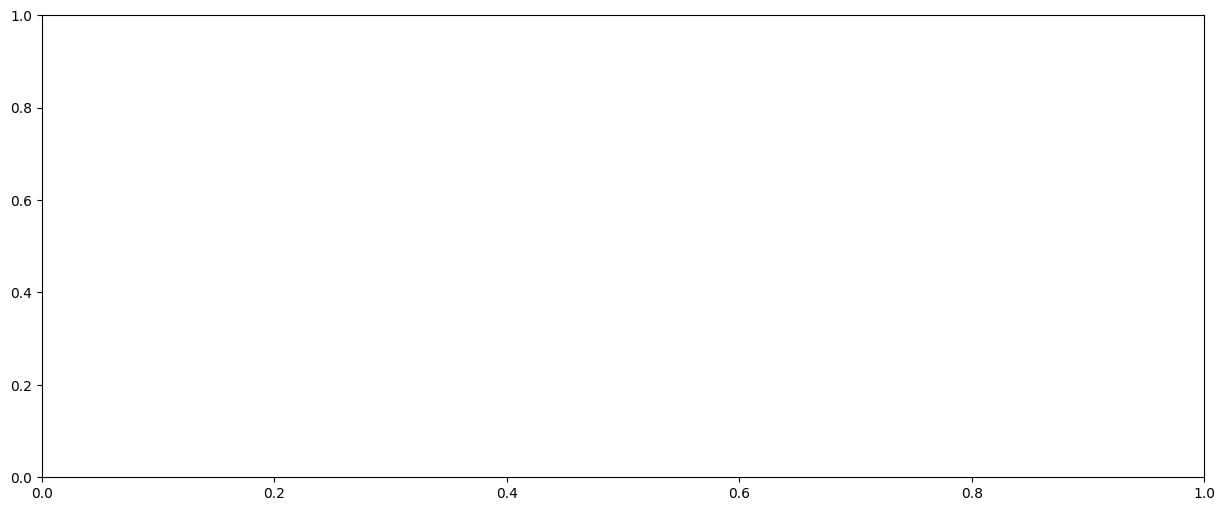

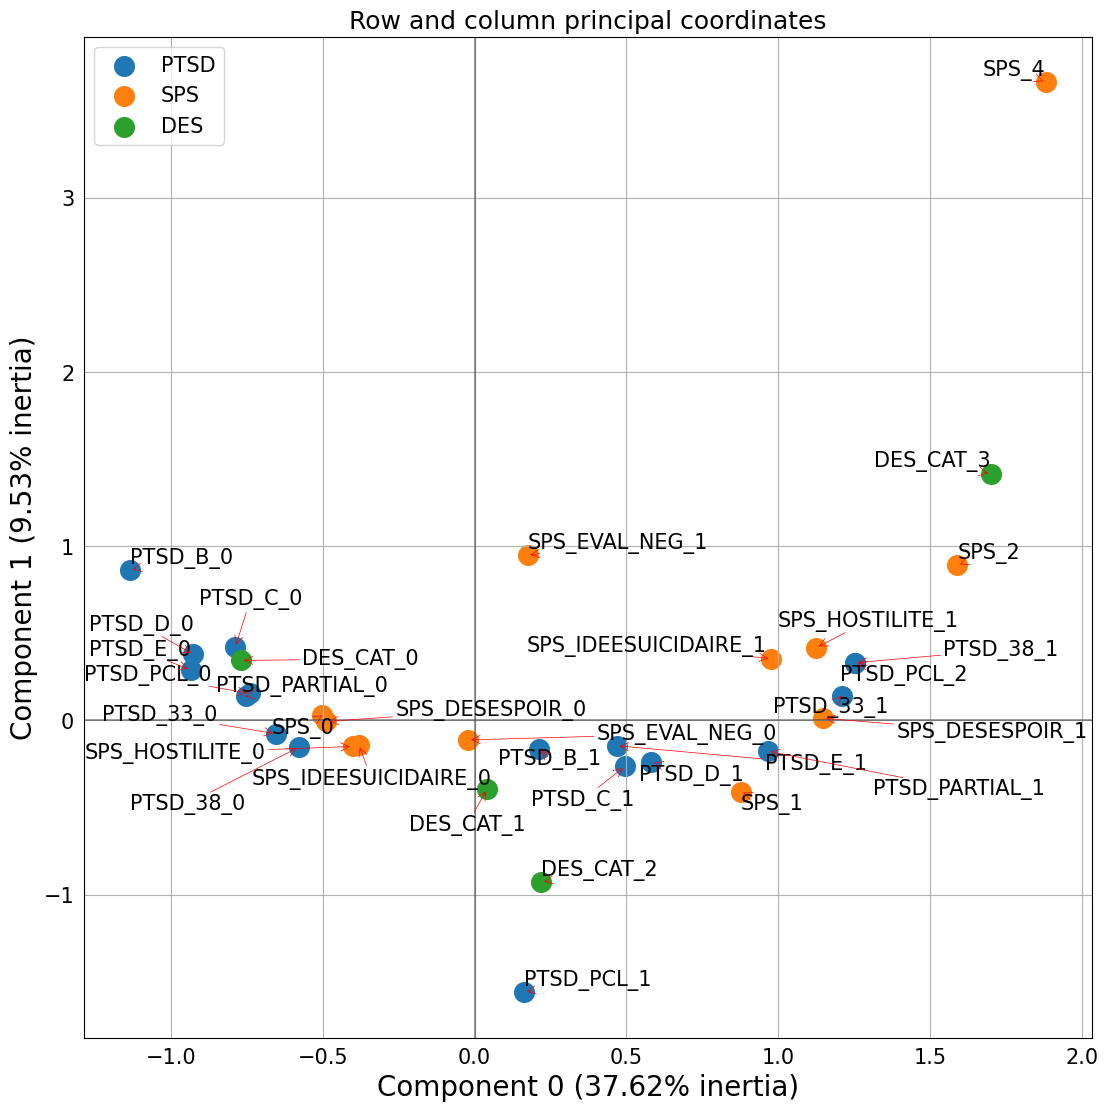

In [21]:
target = "diagnostic_analysis"
mca_cols =  [target] + sps_cols + ['DES_CAT'] #+ ptsd_cols
mca_cols = ptsd_cols + sps_cols + ['DES_CAT']
mca_data = data[mca_cols]
for col in mca_cols :
    mca_data[col] = mca_data[col].astype(str)

mca_data = mca_data.rename(columns={"TOTAL_DES":"DES",'SX_B_INTRUSION': 'PTSD_B',
                                           'SX_C_EVITEMENT': 'PTSD_C',
                                             'SX_D_COGNITION_HUMEUR': 'PTSD_D',
                                               'SX_E_HYPERACTIVITE': 'PTSD_E',
                                                 'PTSD_PARTIAL': 'PTSD_PARTIAL', 
                                                  'TOTAL_PCL': 'PTSD_PCL',
                                                  'SPS_DESESPOIR_POND': 'SPS_DESESPOIR',
                                                  'SPS_IDEESUICIDAIRE_POND': 'SPS_IDEESUICIDAIRE',
                                                  'SPS_EVAL_NEG_POND': 'SPS_EVAL_NEG',
                                                  'SPS_HOSTILITE_POND': 'SPS_HOSTILITE',
                                                  'SPS_TOTAL_POND': 'SPS'})



mca = compute_mca(mca_data = mca_data,mca_col=mca_data.columns, mca_data_name=target,
                  add_ellipse=False, ellipse_col=target, saving_folder="./results/")

## Text features stats analysis

In [22]:
for source in ['Q1',"Q2","Q3","Q4","text"]:
    print("####")
    print(data[f'{source}_token'].apply(len).describe())
    print(data[f'{source}_token'].apply(len).sum())

####
count      57.000000
mean     1070.561404
std       941.889553
min       241.000000
25%       522.000000
50%       813.000000
75%      1306.000000
max      5509.000000
Name: Q1_token, dtype: float64
61022
####
count      57.000000
mean      395.947368
std       381.677005
min         6.000000
25%       120.000000
50%       261.000000
75%       569.000000
max      1401.000000
Name: Q2_token, dtype: float64
22569
####
count      57.000000
mean     1011.649123
std       849.114675
min         0.000000
25%       465.000000
50%       793.000000
75%      1354.000000
max      4740.000000
Name: Q3_token, dtype: float64
57664
####
count     57.000000
mean     374.754386
std      198.676269
min        0.000000
25%      211.000000
50%      371.000000
75%      507.000000
max      980.000000
Name: Q4_token, dtype: float64
21361
####
count      57.000000
mean     2852.912281
std      1363.721278
min       693.000000
25%      1845.000000
50%      2625.000000
75%      3513.000000
max      7408.00

In [22]:
data['TYPE_TRAUMA'].value_counts(normalize=False)

TYPE_TRAUMA
1    29
2    28
Name: count, dtype: int64

## Source and Question 1

### France vs Quebec

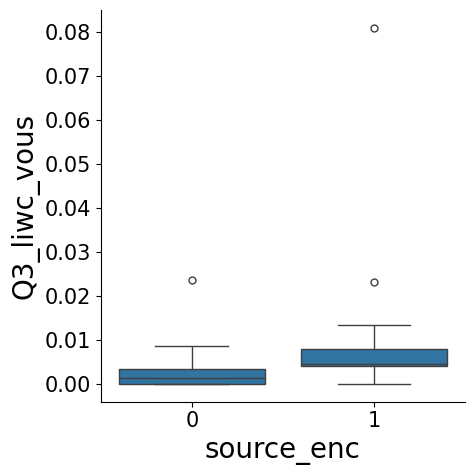

In [301]:
sns.catplot(x="source_enc", y="Q3_liwc_vous", kind="box", data=data)

In [303]:
data.source_enc.value_counts(normalize=True).round(3)*100

source_enc
0    67.2
1    32.8
Name: proportion, dtype: float64

In [26]:
data['source_enc'] = data['source'].apply(lambda x : 1 if x == "quebec" else 0)

text_source = "Q1"
text_features = data.filter(regex=f'{text_source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
results = us.compute_mwu_table( data = data, cible = ['source_enc'], col_list = text_features, seuil = 0.05)
results.sort_values(by='p-val', ascending=True)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
16,source_enc,Q1_empath_émoi,NaN,19.0,two-sided,2.358779e-12,0.947368,0.026316,-1.989328,1.000000
21,source_enc,Q1_empath_mépris,NaN,54.0,two-sided,3.255390e-09,0.850416,0.074792,-0.785764,0.784494
33,source_enc,Q1_score_paticules_matches,NaN,688.0,two-sided,3.257117e-08,-0.905817,0.952909,1.861635,0.999997
32,source_enc,Q1_score_generical_connector_matches,NaN,681.0,two-sided,6.354570e-08,-0.886427,0.943213,1.957174,0.999999
22,source_enc,Q1_empath_pitié,NaN,91.0,two-sided,1.180515e-06,0.747922,0.126039,-0.976605,0.927095
18,source_enc,Q1_empath_honte,NaN,107.0,two-sided,1.226573e-05,0.703601,0.148199,-0.732170,0.725789
10,source_enc,Q1_liwc_consentement,NaN,619.0,two-sided,1.302466e-05,-0.714681,0.857341,0.652345,0.625933
36,source_enc,Q1_long_vowell,NaN,588.0,two-sided,6.730033e-05,-0.628809,0.814404,0.771915,0.770062
17,source_enc,Q1_empath_gaieté,NaN,138.0,two-sided,8.285903e-05,0.617729,0.191136,-0.687323,0.671249
25,source_enc,Q1_ADV,NaN,589.0,two-sided,1.175687e-04,-0.631579,0.815789,1.243364,0.991500


### Dissociation and Question 1

### France + quebec

In [25]:
data.columns.tolist()

['code',
 'duration',
 'interactions',
 'comments',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'text',
 'text_Q1',
 'text_Q2',
 'text_Q3',
 'text_Q4',
 'AGE',
 'NIV_ETU',
 'PROFESSION',
 'STATUT_MARITAL',
 'ENFANTS',
 'NB_ENF',
 'VIOL_SEX',
 'VIOL_PHY',
 'VIOL_PSY',
 'VIOL_ADM_ECO',
 'VIOL_CYBER',
 'VIOL_ANI',
 'VIOL_MAT',
 'NB_VICTIME',
 'NB_PA',
 'VIOL_EXTRA_CONJ',
 'RECIDIVE',
 'CONSO_PA',
 'ATCD_MED',
 'TRAITEMENT',
 'RSQ_MOY',
 'SPS_DESESPOIR_POND',
 'SPS_IDEESUICIDAIRE_POND',
 'SPS_EVAL_NEG_POND',
 'SPS_HOSTILITE_POND',
 'SPS_TOTAL_POND',
 'SX_B_INTRUSION',
 'SX_C_EVITEMENT',
 'SX_D_COGNITION_HUMEUR',
 'SX_E_HYPERACTIVITE',
 'PTSD_PARTIAL',
 'PTSD_33',
 'PTSD_38',
 'TOTAL_PCL',
 'DES_CAT',
 'DES_DEPERSON_DERE',
 'DES_AMNESIE',
 'DES_ABSORPTION',
 'TOTAL_DES',
 'ABS_PRE_DISSOCIATION',
 'TYPE_TRAUMA',
 'source',
 'Q1vsQ3',
 'DES_HYPERVIGILANCE',
 'DES_FLASHBACKS',
 'DES_DISSOFLASHBACKS',
 'DES_DISSOCIATION',
 'PROFILS',
 'TRAUMA_ORIGINE',
 'TRAUMA_ORIGINE_DETAILS',
 'TRAUMA_RELATED_PCLS',
 'ATTA

In [23]:
cont = ["PCL_HYPERVIGILANCE","PCL_DISSOCIATION","PCL_FASHBACK", "TOTAL_DES"]
patho = ['PROFILS', 'PTSD_33', 'PTSD_38', 'TOTAL_PCL',"TRAUMA_ORIGINE", "TYPE_TRAUMA","DISSOCIATION","CRITERE_A",'TRAUMATIC_SYMPTOMS_enc']
PCL = ["PCL_HYPERVIGILANCE", "PCL_DISSOCIATION", "PCL_FASHBACK"] + ['RSQ_MOY']

<Axes: xlabel='PCL_HYPERVIGILANCE', ylabel='Q1_ON_NOUS'>

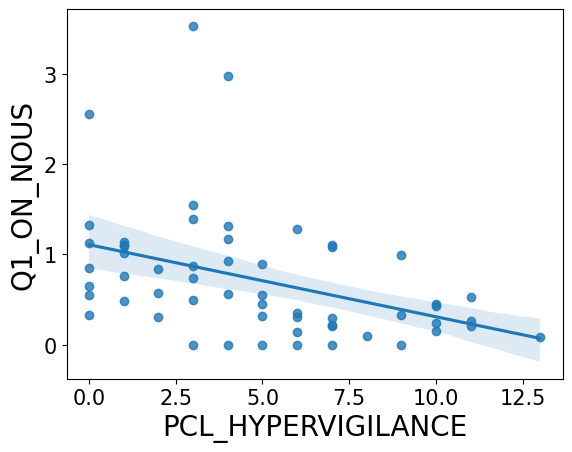

In [24]:
sns.regplot(x="PCL_HYPERVIGILANCE", y="Q1_ON_NOUS", data=data)

In [ ]:
viol = ['VIOL_SEX',
 'VIOL_PHY',
 'VIOL_PSY',
 'VIOL_ADM_ECO',
 'VIOL_CYBER',
 'VIOL_ANI',
 'VIOL_MAT']



In [26]:
corr = data[study_target].corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')


,PCL_REVI_DISSO,PCL_REVIVISCENCES,PCL_DISSO,TOTAL_PCL,TOTAL_DES
PCL_REVI_DISSO,1.000000,0.953034,0.741847,0.860125,0.599614
PCL_REVIVISCENCES,0.953034,1.000000,0.535730,0.823346,0.549727
PCL_DISSO,0.741847,0.535730,1.000000,0.694983,0.523130
TOTAL_PCL,0.860125,0.823346,0.694983,1.000000,0.641973
TOTAL_DES,0.599614,0.549727,0.523130,0.641973,1.000000


In [41]:
data['source_enc'] =data['source'].apply(lambda x:1 if x =="france" else 0)

In [53]:
data['TOTAL_PCL_y']

0     33
1     53
2     38
3     35
4     18
5     54
6      9
7     27
8     38
9      9
10     9
11    39
12    21
13    25
14    28
15     5
16    12
17    12
18    24
19    13
20    16
21     1
22    12
23     9
24    16
25    23
26    14
27    49
28    16
29    25
30    19
31     9
32    57
33    41
34    13
35     3
36     2
37    21
38    52
39    47
40    40
41    60
42    33
43    47
44     7
45     8
46    30
47    32
48    27
49    44
50    34
51    18
52    61
53    53
54    44
55    19
56    59
Name: TOTAL_PCL_y, dtype: int64

<Axes: xlabel='TOTAL_PCL_y'>

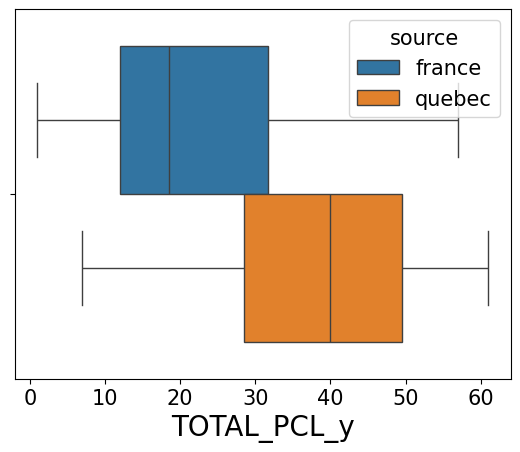

In [60]:
sns.boxplot(x = 'TOTAL_PCL_y', hue = 'source', data = data)

In [61]:
source = "Q2"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
r = us.compute_wilc_table(data,["source_enc"] , col_list = text_features, seuil = 0.05)
r

,x,y,stats,pval,cohen,power


In [62]:
source = "Q2"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
r = us.compute_pearson_table(data,cont , col_list = text_features, seuil = 0.05, method = "spearman")
r

'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOTAL_DES'
'TOT

,x,y,n,r,CI95%,p-val,BF10,power
0,PCL_HYPERVIGILANCE,Q2_count_sents,57,0.416024,"[0.17, 0.61]",0.001288,NaN,0.906483
1,PCL_HYPERVIGILANCE,Q2_passive_count,57,0.315967,"[0.06, 0.53]",0.01665,NaN,0.678152
2,PCL_HYPERVIGILANCE,Q2_passive_count_norm,57,0.312865,"[0.06, 0.53]",0.017809,NaN,0.668959
3,PCL_HYPERVIGILANCE,Q2_passive_sents_count,57,0.309261,"[0.05, 0.53]",0.01924,NaN,0.658174
4,PCL_HYPERVIGILANCE,Q2_binary,57,0.264959,"[0.0, 0.49]",0.046389,NaN,0.519846
...,...,...,...,...,...,...,...,...
150,PCL_FASHBACK,Q2_NUM,57,0.30678,"[0.05, 0.53]",0.020281,NaN,0.65069
151,PCL_FASHBACK,Q2_INTJ,57,-0.27974,"[-0.5, -0.02]",0.035077,NaN,0.566715
152,PCL_FASHBACK,Q2_SYM,57,0.262561,"[0.0, 0.49]",0.048479,NaN,0.512234
153,PCL_FASHBACK,Q2_PRESENT_ENNONCIATION,57,0.281285,"[0.02, 0.5]",0.034039,NaN,0.571599


In [29]:
import pingouin as pg
def test_normality(data, col_list):
    df = pd.DataFrame(columns=['name',"normal","pval"])
    for i, col in enumerate(col_list):
        #print(f"### {col}")
        r = pg.normality(data[col])
        df.loc[i] = pd.Series({"name":col, "normal": r['normal'][0], "pval":r['pval'][0]})
    return df

n = test_normality(data, text_features+study_target)
n[n['normal']==True]

,name,normal,pval
9,Q1_LCC,True,1.0
16,Q1_transitivity,True,0.523212
19,Q1_average_shrotest_path_g0,True,0.069661
83,Q1_liwc_remplisseur,True,1.0
112,Q1_empath_enthousiaisme,True,1.0
128,Q1_empath_reconnaissance,True,1.0
147,Q1_verb_indicatif_present,True,0.558164
149,Q1_verb_participe_passe,True,0.625535
152,Q1_ADP,True,0.059256
153,Q1_NOUN,True,0.354723


In [150]:
for coef in ["spearman"]:
    for question in ["avg"]:
        source = question
        for population in [0,1,2]:
            
            text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
            if population == 0:
                pop = data
                pop_name = "ALL"
            else :
                pop = data[data['TYPE_TRAUMA']==population]
                pop_name = f"TRAUMA_type_{population}"
            print(f"#### {source} - {pop_name}")
            r = us.compute_pearson_table(pop,study_target , col_list = text_features, seuil = 0.05, method = coef)
            r = r[['x','y', 'r','p-val','power']]
            mask_liwc = ~r["y"].astype(str).str.contains('liwc', case=False, na=False)
            r = r[mask_liwc]
            r['power'] = r['power'].apply(lambda x : round(x,2))
            r['r'] = r['r'].apply(lambda x : round(x,2))
            r.sort_values("x").to_csv(f"results/corr/corr_{source}_{pop_name}_{coef}.csv",sep="\t")
            print(f"corr_{source}_{pop_name}_{coef} is done ! ")



#### avg - ALL


/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scip

corr_avg_ALL_spearman is done ! 
#### avg - TRAUMA_type_1


/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scip

corr_avg_TRAUMA_type_1_spearman is done ! 
#### avg - TRAUMA_type_2


/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scip

corr_avg_TRAUMA_type_2_spearman is done ! 


/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/robin/env/violent_men/lib/python3.9/site-packages/scip

In [ ]:
ype_trauma = 2
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
if type_trauma == 0:
    pop = data
else :
    pop = data[data['TYPE_TRAUMA']==type_trauma]
r = us.compute_pearson_table(pop,cont , col_list = text_features, seuil = 0.05, method = "spearman")
r


In [53]:
source = "Q1"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
type_trauma = 2
results = us.compute_wilc_table( data = data[data['TYPE_TRAUMA']==type_trauma], cible = ["DISSOCIATION"], col_list = text_features, seuil = 0.05)
results

,x,y,stats,pval,cohen,power
0,DISSOCIATION,Q1_passive_percentages,-2.109639,0.034890,-0.717897,0.192190
1,DISSOCIATION,Q1_liwc_nous,-2.109639,0.034890,-0.861337,0.298130
2,DISSOCIATION,Q1_textblob_polarity,-2.445263,0.014475,-1.055037,0.471727
3,DISSOCIATION,Q1_NUM,1.965800,0.049322,0.441751,0.063729
4,DISSOCIATION,Q1_ADJ,-2.541155,0.011049,-0.816684,0.262510
5,DISSOCIATION,Q1_ON_NOUS,-2.708968,0.006749,-1.246773,0.649076


In [49]:
source = "Q1"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
type_trauma = 1
results = us.compute_anova_table( data = data[data['TYPE_TRAUMA']==type_trauma], cible = ['DES_CAT',"DISSOCIATION"], col_list = text_features, seuil = 0.05)
results

,x,y,p-unc,np2,power
0,DES_CAT,Q1_liwc_humain,0.040004,0.278338,0.999969
1,DES_CAT,Q1_liwc_religion,0.001249,0.462177,1.000000
2,DES_CAT,Q1_empath_émoi,0.044456,0.271663,0.999952
3,DES_CAT,Q1_CCONJ,0.038611,0.280561,0.999973
4,DES_CAT,Q1_score_generical_connector_matches,0.004979,0.396120,1.000000
5,DES_CAT,Q1_score_paticules_matches,0.017310,0.328700,0.999999
6,DES_CAT,Q1_filled_break,0.038009,0.281545,0.999975
7,DISSOCIATION,Q1_liwc_religion,0.048916,0.136092,0.843879
8,DISSOCIATION,Q1_empath_inquiétude,0.034112,0.155765,0.895210
9,DISSOCIATION,Q1_X,0.037743,0.150255,0.882410


In [69]:
source = "Q3"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
type_trauma = 2
results = us.compute_anova_table( data = data[data['TYPE_TRAUMA']>=type_trauma], cible = ['DES_CAT']+patho, col_list = text_features, seuil = 0.05)
results

,x,y,p-unc,np2,power
0,DES_CAT,Q3_LSC,0.020202,0.330379,0.999999
1,DES_CAT,Q3_liwc_fonction,0.015793,0.344931,1.000000
2,DES_CAT,Q3_liwc_pronom,0.004220,0.416982,1.000000
3,DES_CAT,Q3_liwc_pronomp,0.004302,0.415997,1.000000
4,DES_CAT,Q3_liwc_je,0.006521,0.394265,1.000000
...,...,...,...,...,...
160,CRITERE_A,Q3_connecteur,0.018724,0.282150,0.999555
161,TRAUMATIC_SYMPTOMS_enc,Q3_empath_lassitude,0.043327,0.222070,0.993849
162,TRAUMATIC_SYMPTOMS_enc,Q3_third_personal_pronoun,0.043143,0.222334,0.993911
163,TRAUMATIC_SYMPTOMS_enc,Q3_ADJ,0.009696,0.309876,0.999895


In [70]:
source = "Q3"
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
type_trauma = 2
results = us.compute_pearson_table( data = data[data['TYPE_TRAUMA']==type_trauma], cible = cont + ['TOTAL_DES'], col_list = text_features, seuil = 0.05)

results

,x,y,n,r,CI95%,p-val,BF10,power
0,PCL_HYPERVIGILANCE,Q3_liwc_ils,28,0.442134,"[0.08, 0.7]",0.018485,3.29,0.673894
1,PCL_HYPERVIGILANCE,Q3_liwc_tristesse,28,0.48674,"[0.14, 0.73]",0.008623,6.246,0.770139
2,PCL_HYPERVIGILANCE,Q3_liwc_divergence,28,0.410589,"[0.04, 0.68]",0.029984,2.208,0.600632
3,PCL_HYPERVIGILANCE,Q3_empath_adoration,28,0.388164,"[0.02, 0.66]",0.041236,1.705,0.547569
4,PCL_HYPERVIGILANCE,Q3_empath_joie,28,0.386327,"[0.02, 0.66]",0.042289,1.671,0.543221
...,...,...,...,...,...,...,...,...
68,TOTAL_DES,Q3_verb_indicatif_present,28,0.50361,"[0.16, 0.74]",0.006293,8.169,0.803067
69,TOTAL_DES,Q3_verb_indicatif_future,28,0.609614,"[0.31, 0.8]",0.000574,65.675,0.948799
70,TOTAL_DES,Q3_verb_indicatif_imparfait,28,-0.393528,"[-0.67, -0.02]",0.038279,1.81,0.560275
71,TOTAL_DES,Q3_SCONJ,28,0.572313,"[0.25, 0.78]",0.001461,28.898,0.910381


In [43]:
data.filter(regex="RSQ")

,RSQ_MOY
0,2.700000
1,3.100000
2,3.630000
3,3.330000
4,2.530000
5,3.170000
6,2.670000
7,2.800000
8,2.930000
9,2.800000


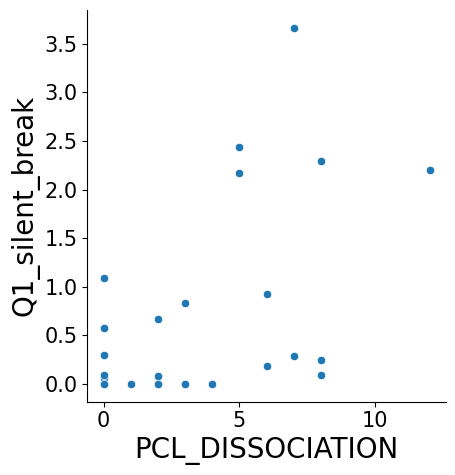

In [66]:
import seaborn as sns
sns.relplot(data = data[data['TYPE_TRAUMA']>=type_trauma], y = "Q1_silent_break",x  ="PCL_DISSOCIATION", kind  = "scatter")

### France

In [234]:
source = "Q1"
fr = data[data['source']=="france"]
text_features = fr.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
type_trauma = 2
results = us.compute_anova_table( data = fr[fr['TYPE_TRAUMA']==type_trauma], cible = ['DES_CAT'], col_list = text_features, seuil = 0.05)
results

fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'
fail to compute anova becuase of 'p-unc'


,x,y,p-unc,np2,power
0,DES_CAT,Q1_passive_count_norm,0.047192,0.401686,0.999994
1,DES_CAT,Q1_passive_percentages,0.028080,0.444605,1.000000
2,DES_CAT,Q1_binary,0.027210,0.447090,1.000000
3,DES_CAT,Q1_liwc_vous,0.040570,0.414571,0.999997
4,DES_CAT,Q1_liwc_biologique,0.044669,0.406407,0.999996
5,DES_CAT,Q1_liwc_santé,0.013295,0.500417,1.000000
6,DES_CAT,Q1_feel_joy,0.045327,0.405155,0.999995
7,DES_CAT,Q1_NOUN,0.045660,0.404526,0.999995
8,DES_CAT,Q1_ON_QUELQU_UN,0.005475,0.558768,1.000000
9,DES_CAT,Q1_SENSATIONS_PHYSIQUES,0.032765,0.432231,0.999999


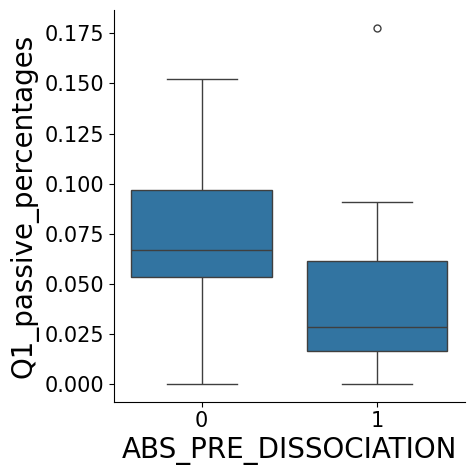

In [314]:
sns.catplot(x="ABS_PRE_DISSOCIATION", y="Q1_passive_percentages", kind="box", data = data[data['TYPE_TRAUMA']>=type_trauma])

In [315]:
data['ABS_PRE_DISSOCIATION'] = data['ABS_PRE_DISSOCIATION'].apply(lambda x: int(x))

q1_text_features = data.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()

type_trauma = 1
results = us.compute_mwu_table(data = data[data['TYPE_TRAUMA']>=type_trauma], cible = ['ABS_PRE_DISSOCIATION'], col_list = q1_text_features, seuil = 0.05)

results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
4,ABS_PRE_DISSOCIATION,Q1_VERB_PERCEPTIONS_SENSORIELLES,NaN,287.0,two-sided,0.041031,0.314217,0.342891,-0.604963,0.617405
2,ABS_PRE_DISSOCIATION,Q1_ADJ,NaN,563.0,two-sided,0.024785,-0.345281,0.672640,0.585688,0.589687
1,ABS_PRE_DISSOCIATION,Q1_second_personal_pronoun,NaN,537.5,two-sided,0.009073,-0.284349,0.642174,0.543422,0.527510
0,ABS_PRE_DISSOCIATION,Q1_LSC,NaN,546.0,two-sided,0.034403,-0.304659,0.652330,0.540457,0.523105
3,ABS_PRE_DISSOCIATION,Q1_ON_NOUS,NaN,562.0,two-sided,0.025725,-0.342891,0.671446,0.462509,0.407951


In [243]:
data['ABS_PRE_DISSOCIATION'] = data['ABS_PRE_DISSOCIATION'].apply(lambda x: int(x))
fr['ABS_PRE_DISSOCIATION'] = fr['ABS_PRE_DISSOCIATION'].apply(lambda x: int(x))
q1_text_features = fr.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()

type_trauma = 2
results = us.compute_mwu_table(data = data[data['TYPE_TRAUMA']==type_trauma], cible = ['ABS_PRE_DISSOCIATION'], col_list = q1_text_features, seuil = 0.05)

results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
5,ABS_PRE_DISSOCIATION,Q1_ON_NOUS,NaN,152.5,two-sided,0.017074,-0.540404,0.770202,1.049819,0.753179
2,ABS_PRE_DISSOCIATION,Q1_textblob_polarity,NaN,150.0,two-sided,0.023219,-0.515152,0.757576,0.932963,0.651914
4,ABS_PRE_DISSOCIATION,Q1_ADJ,NaN,160.0,two-sided,0.006543,-0.616162,0.808081,0.871345,0.593062
0,ABS_PRE_DISSOCIATION,Q1_passive_percentages,NaN,151.0,two-sided,0.020284,-0.525253,0.762626,0.795964,0.518235
1,ABS_PRE_DISSOCIATION,Q1_liwc_nous,NaN,147.0,two-sided,0.025245,-0.484848,0.742424,0.778845,0.501055
3,ABS_PRE_DISSOCIATION,Q1_NUM,NaN,50.0,two-sided,0.029184,0.494949,0.252525,-0.553057,0.286080


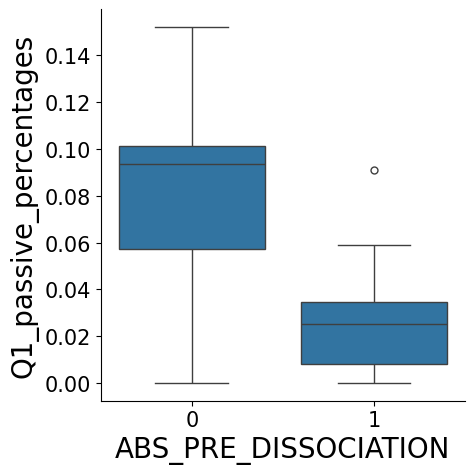

In [245]:
sns.catplot(x="ABS_PRE_DISSOCIATION", y="Q1_passive_percentages", kind="box", data=fr[fr['TYPE_TRAUMA']==type_trauma])

### PTSD et Q1

In [194]:
ptsd_cols

['SX_B_INTRUSION',
 'SX_C_EVITEMENT',
 'SX_D_COGNITION_HUMEUR',
 'SX_E_HYPERACTIVITE',
 'PTSD_PARTIAL',
 'PTSD_33',
 'PTSD_38',
 'TOTAL_PCL']

In [205]:
q1_text_features = data.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()
target_cols = ["PTSD_33" ]#['PTSD_33','SX_B_INTRUSION', 'SX_C_EVITEMENT','SX_D_COGNITION_HUMEUR', 'SX_E_HYPERACTIVITE']
results = us.compute_mwu_table(data = data, cible = target_cols, col_list = q1_text_features, seuil = 0.05)

results[results.power >0.1].sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
9,PTSD_33,Q1_ON_NOUS,NaN,617.5,two-sided,0.000217,-0.589447,0.794723,0.909086,0.904873
1,PTSD_33,Q1_liwc_sexualité,NaN,266.5,two-sided,0.043218,0.314028,0.342986,-0.651457,0.649300
7,PTSD_33,Q1_DET,NaN,242.5,two-sided,0.018568,0.375804,0.312098,-0.642903,0.637833
10,PTSD_33,Q1_score_generical_connector_matches,NaN,524.0,two-sided,0.028949,-0.348777,0.674389,0.623294,0.611091
11,PTSD_33,Q1_score_paticules_matches,NaN,519.0,two-sided,0.035441,-0.335907,0.667954,0.599585,0.578051
8,PTSD_33,Q1_NUM,NaN,208.0,two-sided,0.003560,0.464607,0.267696,-0.592411,0.567933
6,PTSD_33,Q1_empath_inquiétude,NaN,549.0,two-sided,0.009502,-0.413127,0.706564,0.573743,0.541413
4,PTSD_33,Q1_empath_bienveillance,NaN,541.0,two-sided,0.013924,-0.392535,0.696268,0.453927,0.371992
5,PTSD_33,Q1_empath_émotion,NaN,520.0,two-sided,0.034052,-0.338481,0.669241,0.390070,0.289251
2,PTSD_33,Q1_liwc_religion,NaN,262.0,two-sided,0.014550,0.325611,0.337194,-0.388839,0.287747


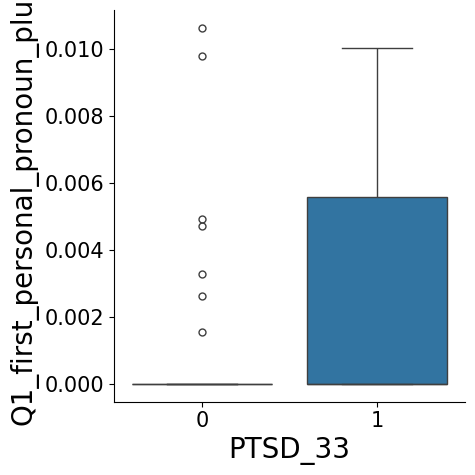

In [207]:
import seaborn as sns
sns.catplot(x="PTSD_33", y="Q1_first_personal_pronoun_plur", kind="box", data=data)

### TRAUMA type 1 ptsd et Q1

In [316]:
q1_text_features = data.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()

type_trauma = 1
results = us.compute_mwu_table(data = data[data['TYPE_TRAUMA']>=type_trauma], cible = ['PTSD_33',"PTSD_38"], col_list = q1_text_features, seuil = 0.05)

results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
9,PTSD_33,Q1_ON_NOUS,NaN,617.5,two-sided,0.000217,-0.589447,0.794723,0.909086,0.904873
23,PTSD_38,Q1_ON_NOUS,NaN,583.0,two-sided,0.000441,-0.573549,0.786775,0.876963,0.868730
24,PTSD_38,Q1_VERB_PERCEPTIONS_SENSORIELLES,NaN,220.0,two-sided,0.012901,0.406208,0.296896,-0.746378,0.745967
20,PTSD_38,Q1_ADV,NaN,500.0,two-sided,0.032582,-0.349528,0.674764,0.679255,0.664995
1,PTSD_33,Q1_liwc_sexualité,NaN,266.5,two-sided,0.043218,0.314028,0.342986,-0.651457,0.649300
25,PTSD_38,Q1_score_generical_connector_matches,NaN,509.0,two-sided,0.022236,-0.373819,0.686910,0.658524,0.638082
7,PTSD_33,Q1_DET,NaN,242.5,two-sided,0.018568,0.375804,0.312098,-0.642903,0.637833
10,PTSD_33,Q1_score_generical_connector_matches,NaN,524.0,two-sided,0.028949,-0.348777,0.674389,0.623294,0.611091
26,PTSD_38,Q1_score_paticules_matches,NaN,506.0,two-sided,0.025312,-0.365722,0.682861,0.635932,0.607959
18,PTSD_38,Q1_first_personal_pronoun_plur,NaN,272.0,two-sided,0.034935,0.265857,0.367072,-0.633866,0.605168


## TRAUMA type 2 et PTSD et Q1

In [160]:
q1_text_features = data.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()

type_trauma = 2
results = us.compute_mwu_table(data = data[data['TYPE_TRAUMA']==type_trauma], cible = ['PTSD_33',"PTSD_38"], col_list = q1_text_features, seuil = 0.05)

results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
5,PTSD_33,Q1_silent_break,NaN,33.0,two-sided,0.001699,0.682692,0.158654,-1.355149,0.937909
4,PTSD_33,Q1_ON_NOUS,NaN,160.0,two-sided,0.014816,-0.538462,0.769231,1.047425,0.771632
18,PTSD_38,Q1_silent_break,NaN,45.0,two-sided,0.014647,0.545455,0.227273,-1.021974,0.730547
17,PTSD_38,Q1_ON_NOUS,NaN,147.5,two-sided,0.030765,-0.489899,0.744949,0.963328,0.679715
2,PTSD_33,Q1_liwc_sexualité,NaN,47.5,two-sided,0.009157,0.543269,0.228365,-0.907665,0.649437
13,PTSD_38,Q1_empath_étonnement,NaN,148.0,two-sided,0.029264,-0.494949,0.747475,0.869077,0.590846
16,PTSD_38,Q1_verb_conditionel,NaN,48.0,two-sided,0.014485,0.515152,0.242424,-0.864206,0.586075
15,PTSD_38,Q1_gobin_PCneg,NaN,144.0,two-sided,0.045487,-0.454545,0.727273,0.857348,0.579338
11,PTSD_38,Q1_polarimot_positive,NaN,153.0,two-sided,0.016188,-0.545455,0.772727,0.824490,0.546773
8,PTSD_38,Q1_liwc_accomplissement,NaN,150.0,two-sided,0.023219,-0.515152,0.757576,0.818547,0.540843


### SPS_DESESPOIR_POND et Q2

In [177]:

q2_text_features = data.filter(regex='Q2_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_mwu_table(data = data, cible = ['SPS_DESESPOIR_POND'], col_list = q2_text_features, seuil = 0.05)

results[results.power>0.5].sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
61,SPS_DESESPOIR_POND,Q2_SCONJ,NaN,140.5,two-sided,0.000224,0.609722,0.195139,-1.198117,0.985664
6,SPS_DESESPOIR_POND,Q2_number_of_nodes,NaN,198.5,two-sided,0.006806,0.448611,0.275694,-1.001273,0.934059
7,SPS_DESESPOIR_POND,Q2_number_of_edges,NaN,209.0,two-sided,0.011417,0.419444,0.290278,-0.950907,0.908635
59,SPS_DESESPOIR_POND,Q2_PRON,NaN,156.0,two-sided,0.000626,0.566667,0.216667,-0.947652,0.906771
8,SPS_DESESPOIR_POND,Q2_PE,NaN,209.5,two-sided,0.011660,0.418056,0.290972,-0.932939,0.897995
1,SPS_DESESPOIR_POND,Q2_passive_count,NaN,205.0,two-sided,0.004852,0.430556,0.284722,-0.921397,0.890700
2,SPS_DESESPOIR_POND,Q2_passive_count_norm,NaN,210.5,two-sided,0.006981,0.415278,0.292361,-0.857407,0.843457
0,SPS_DESESPOIR_POND,Q2_count_sents,NaN,220.5,two-sided,0.019409,0.387500,0.306250,-0.834651,0.823815
3,SPS_DESESPOIR_POND,Q2_passive_sents_count,NaN,211.0,two-sided,0.006750,0.413889,0.293056,-0.824722,0.814776
66,SPS_DESESPOIR_POND,Q2_score_paticules_matches,NaN,492.5,two-sided,0.025855,-0.368056,0.684028,0.788396,0.779317


In [179]:
q2_text_features = data.filter(regex='Q2_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_mwu_table(data = data, cible = ['SPS_IDEESUICIDAIRE_POND'], col_list = q2_text_features, seuil = 0.05)

results[results.power>0.5].sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
0,SPS_IDEESUICIDAIRE_POND,Q2_count_sents,NaN,81.5,two-sided,0.000010,0.757440,0.121280,-1.467634,0.998403
5,SPS_IDEESUICIDAIRE_POND,Q2_number_of_nodes,NaN,143.5,two-sided,0.000836,0.572917,0.213542,-1.092779,0.954979
11,SPS_IDEESUICIDAIRE_POND,Q2_L1,NaN,178.5,two-sided,0.006034,0.468750,0.265625,-1.010696,0.922301
4,SPS_IDEESUICIDAIRE_POND,Q2_binary,NaN,183.0,two-sided,0.002178,0.455357,0.272321,-0.980407,0.906489
10,SPS_IDEESUICIDAIRE_POND,Q2_degree_std,NaN,134.0,two-sided,0.000456,0.601190,0.199405,-0.978144,0.905219
1,SPS_IDEESUICIDAIRE_POND,Q2_passive_count,NaN,178.5,two-sided,0.003049,0.468750,0.265625,-0.939279,0.881380
6,SPS_IDEESUICIDAIRE_POND,Q2_number_of_edges,NaN,145.5,two-sided,0.000947,0.566964,0.216518,-0.938636,0.880953
9,SPS_IDEESUICIDAIRE_POND,Q2_degree_average,NaN,145.0,two-sided,0.000919,0.568452,0.215774,-0.928051,0.873765
3,SPS_IDEESUICIDAIRE_POND,Q2_passive_sents_count,NaN,180.0,two-sided,0.003323,0.464286,0.267857,-0.882788,0.839648
2,SPS_IDEESUICIDAIRE_POND,Q2_passive_count_norm,NaN,186.5,two-sided,0.005232,0.444940,0.277530,-0.864755,0.824514


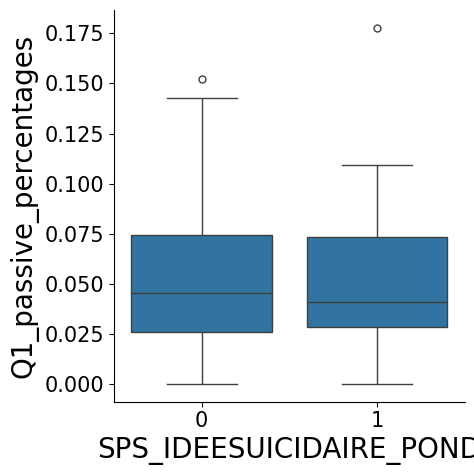

In [267]:
sns.catplot(x="SPS_IDEESUICIDAIRE_POND", y="Q1_passive_percentages", kind="box", data=data)

In [180]:
q2_text_features = data.filter(regex='Q2_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_mwu_table(data = data, cible = ['SPS_EVAL_NEG_POND'], col_list = q2_text_features, seuil = 0.05)

results[results.power>0.5].sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
9,SPS_EVAL_NEG_POND,Q2_ON_QUELQU_UN,NaN,64.0,two-sided,0.000097,0.589744,0.205128,-1.163799,0.755762
0,SPS_EVAL_NEG_POND,Q2_liwc_verbefutur,NaN,71.5,two-sided,0.016402,0.541667,0.229167,-0.959329,0.589717
8,SPS_EVAL_NEG_POND,Q2_NUM,NaN,76.0,two-sided,0.038795,0.512821,0.243590,-0.952206,0.583396
5,SPS_EVAL_NEG_POND,Q2_verb_conditionel,NaN,69.0,two-sided,0.006033,0.557692,0.221154,-0.900205,0.536694


In [ ]:
q2_text_features = data.filter(regex='Q2_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_mwu_table(data = data, cible = ['SPS_HOSTILITE_POND'], col_list = q2_text_features, seuil = 0.05)

results[results.power>0.5].sort_values(by='power', ascending=False)

In [318]:
q2_text_features = data.filter(regex='Q2_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_mwu_table(data = data, cible = ['ABS_PRE_DISSOCIATION'], col_list = q2_text_features, seuil = 0.05)

results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
1,ABS_PRE_DISSOCIATION,Q2_liwc_loisir,NaN,262.0,two-sided,0.007682,0.373955,0.313023,-0.428788,0.359984
4,ABS_PRE_DISSOCIATION,Q2_empath_hostilité,NaN,561.0,two-sided,0.026006,-0.340502,0.670251,0.360078,0.269587
6,ABS_PRE_DISSOCIATION,Q2_empath_insatisfaction,NaN,553.0,two-sided,0.035667,-0.321386,0.660693,0.350980,0.258555
3,ABS_PRE_DISSOCIATION,Q2_empath_émotion,NaN,561.0,two-sided,0.026006,-0.340502,0.670251,0.350905,0.258465
7,ABS_PRE_DISSOCIATION,Q2_empath_respect,NaN,576.0,two-sided,0.013844,-0.376344,0.688172,0.348533,0.255629
2,ABS_PRE_DISSOCIATION,Q2_empath_affection,NaN,549.0,two-sided,0.042007,-0.311828,0.655914,0.239867,0.145742
0,ABS_PRE_DISSOCIATION,Q2_liwc_tristesse,NaN,553.5,two-sided,0.034097,-0.322581,0.661290,-0.057900,0.055372
5,ABS_PRE_DISSOCIATION,Q2_empath_inquiétude,NaN,587.5,two-sided,0.008331,-0.403823,0.701912,0.032184,0.051656


### Question 3 and ??

<Axes: xlabel='Count', ylabel='Q3_MORT_EXPLICITE'>

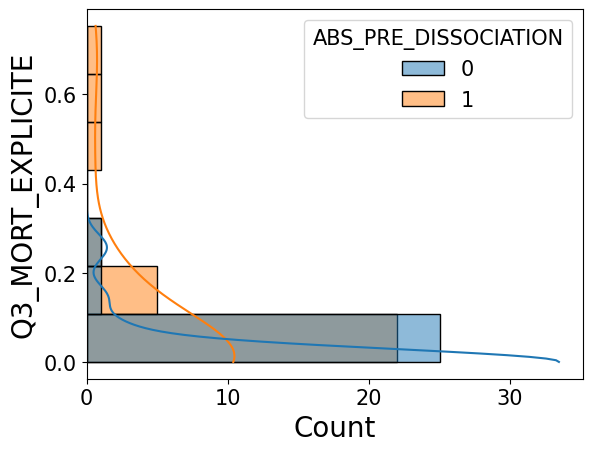

In [325]:
sns.histplot(hue="ABS_PRE_DISSOCIATION", y="Q3_MORT_EXPLICITE",  data=data, kde=True)

In [268]:
q3_text_features = data.filter(regex='Q3_.*').select_dtypes(include=['float', 'int']).columns.to_list()

target = ["PTSD_33","PTSD_38"] + ['ABS_PRE_DISSOCIATION']
results = us.compute_mwu_table(data = data[], cible = target, col_list = q3_text_features, seuil = 0.05)
results.sort_values(by='power', ascending=False)

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
23,ABS_PRE_DISSOCIATION,Q3_SENSATIONS_PHYSIQUES,NaN,261.0,two-sided,0.014143,0.376344,0.311828,-0.703431,0.747351
5,PTSD_33,Q3_verb_indicatif_future,NaN,269.0,two-sided,0.034808,0.307593,0.346203,-0.685919,0.694048
14,PTSD_38,Q3_verb_indicatif_future,NaN,259.5,two-sided,0.044763,0.299595,0.350202,-0.702152,0.693763
21,ABS_PRE_DISSOCIATION,Q3_INTJ,NaN,309.5,two-sided,0.031762,0.260454,0.369773,-0.643042,0.670318
6,PTSD_33,Q3_SCONJ,NaN,257.0,two-sided,0.034024,0.338481,0.330759,-0.653812,0.652434
2,PTSD_33,Q3_liwc_religion,NaN,286.5,two-sided,0.028698,0.262548,0.368726,-0.647095,0.643469
15,PTSD_38,Q3_SCONJ,NaN,247.0,two-sided,0.041539,0.333333,0.333333,-0.633729,0.604983
19,ABS_PRE_DISSOCIATION,Q3_liwc_inhibition,NaN,275.0,two-sided,0.025677,0.342891,0.328554,-0.568639,0.564786
22,ABS_PRE_DISSOCIATION,Q3_ON_QUELQU_UN,NaN,326.0,two-sided,0.049497,0.221027,0.389486,-0.550600,0.538159
20,ABS_PRE_DISSOCIATION,Q3_liwc_hésitation,NaN,337.5,two-sided,0.017595,0.193548,0.403226,-0.466584,0.413861


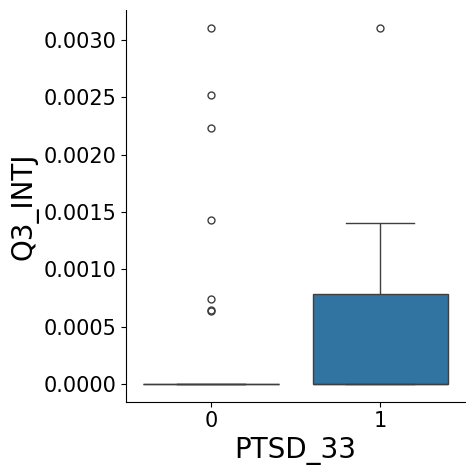

In [274]:
sns.catplot(x="PTSD_33", y="Q3_INTJ", kind="box", data=data)

In [277]:

q3_text_features = data.filter(regex='Q3_.*').select_dtypes(include=['float', 'int']).columns.to_list()

results = us.compute_pearson_table(data = data, cible = ['RSQ_MOY'], col_list = q3_text_features, seuil = 0.05)
results


array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs 

,x,y,n,r,CI95%,p-val,BF10,power
0,RSQ_MOY,Q3_score_generical_connector_matches,58,-0.331388,"[-0.54, -0.08]",0.011051,3.821,0.730165
1,RSQ_MOY,Q3_score_paticules_matches,58,-0.405737,"[-0.6, -0.16]",0.001579,21.333,0.895578
2,RSQ_MOY,Q3_filled_break,54,-0.29815,"[-0.52, -0.03]",0.028542,1.753,0.600084


### Q4 and ???

In [189]:
q4_text_features = data.filter(regex='Q4_.*').select_dtypes(include=['float', 'int']).columns.to_list()

target = ["PTSD_33","PTSD_38"] + ['ABS_PRE_DISSOCIATION']
results = us.compute_mwu_table(data = data, cible = target, col_list = q4_text_features, seuil = 0.05)
results

,x,y,T,U-val,alternative,p-val,RBC,CLES,cohen,power
0,PTSD_33,Q4_passive_percentages,NaN,539.5,two-sided,0.012262,-0.388674,0.694337,0.474811,0.400681
1,PTSD_33,Q4_binary,NaN,505.5,two-sided,0.024933,-0.301158,0.650579,0.638963,0.632509
2,PTSD_33,Q4_liwc_adverbe,NaN,521.0,two-sided,0.032709,-0.341055,0.670528,0.432255,0.342972
3,PTSD_33,Q4_liwc_anxiété,NaN,279.0,two-sided,0.037530,0.281853,0.359073,-0.468545,0.392009
4,PTSD_33,Q4_liwc_tentative,NaN,581.0,two-sided,0.001891,-0.495495,0.747748,0.718426,0.733769
5,PTSD_33,Q4_liwc_loisir,NaN,249.5,two-sided,0.021197,0.357786,0.321107,-0.486663,0.417221
6,PTSD_33,Q4_liwc_maison,NaN,254.0,two-sided,0.008181,0.346203,0.326898,-0.475775,0.402020
7,PTSD_33,Q4_liwc_consentement,NaN,561.5,two-sided,0.005059,-0.445302,0.722651,0.242787,0.140931
8,PTSD_33,Q4_feel_disgust,NaN,533.0,two-sided,0.019817,-0.371943,0.685972,NaN,NaN
9,PTSD_33,Q4_empath_admiration,NaN,517.0,two-sided,0.038360,-0.330759,0.665380,NaN,NaN


In [ ]:
import warnings
warnings.filterwarnings('ignore')

q1_text_features = data.filter(regex='Q1_.*').select_dtypes(include=['float', 'int']).columns.to_list()
q3_text_features = data.filter(regex='Q3_.*').select_dtypes(include=['float', 'int']).columns.to_list()
text_text_features = data.filter(regex='text_.*').select_dtypes(include=['float', 'int']).columns.to_list()
target = ptsd_cols + sps_cols + ['TOTAL_DES'] + violence_cols + socio_cols_cat + conso_cols

for source in ['Q1',"Q2","Q3","Q4","text"]:
    text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
    for target_name, targets_list in {"PTSD":ptsd_cols,"SPS":sps_cols,"VIOLENCE":violence_cols,"CONSO":conso_cols,"SOCIO":socio_cols_cat,"DES":des_cols}.items():
        if target_name == "DES":
            results = compute_pearson_table(data = data, cible = targets_list, col_list = text_features, seuil = 0.05)
        else :
            results = us.compute_mwu_table(data = data, cible = targets_list, col_list = text_features, seuil = 0.05)
        results.sort_values(by='x').to_csv(f"./results/{source}_{target_name}_mwu_results.csv")

In [68]:
import warnings
warnings.filterwarnings('ignore')
text_features = data.filter(regex=f'{source}_.*').select_dtypes(include=['float', 'int']).columns.to_list()
target  = des_cols
r = compute_pearson_table(data = data, cible = target, col_list = text_features, seuil = 0.1)

In [69]:
r

,x,y,n,r,CI95%,p-val,BF10,power
0,TOTAL_DES,Q1_passive_percentages,37,-0.411289,"[-0.65, -0.1]",0.011441,4.442,0.731979
1,TOTAL_DES,Q1_binary,37,-0.376867,"[-0.62, -0.06]",0.021492,2.606,0.647425
2,TOTAL_DES,Q1_LSC,37,-0.356216,"[-0.61, -0.04]",0.030468,1.949,0.593907
3,TOTAL_DES,Q1_liwc_colère,37,0.318276,"[-0.01, 0.58]",0.054883,1.206,0.493992
4,TOTAL_DES,Q1_liwc_divergence,37,0.289313,"[-0.04, 0.56]",0.082426,0.874,0.419434
...,...,...,...,...,...,...,...,...
97,DES_ABSORPTION,Q1_ON_QUELQU_UN,37,0.447671,"[0.14, 0.67]",0.005464,8.394,0.811095
98,DES_ABSORPTION,Q1_PRESENT_ENNONCIATION,37,0.285403,"[-0.04, 0.56]",0.086847,0.839,0.409637
99,DES_ABSORPTION,Q1_VERB_PERCEPTIONS_SENSORIELLES,37,0.315775,"[-0.01, 0.58]",0.056924,1.172,0.48745
100,DES_ABSORPTION,Q1_SENSATIONS_PHYSIQUES,37,-0.316595,"[-0.58, 0.01]",0.056248,1.183,0.489593


In [58]:
results.sort_values(by='p-val').to_csv("./results/mwu_results.csv")

In [61]:

results = us.compute_ttest_table(data = data, cible = ptsd_cols, col_list = q1_text_features, seuil = 0.05)
results

,x,y,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
0,SX_B_INTRUSION,Q1_passive_percentages,2.148987,35,two-sided,0.038632,"[0.0, 0.06]",0.902038,1.918,0.551683
1,SX_B_INTRUSION,Q1_diameter_g0,2.447354,35,two-sided,0.019551,"[0.13, 1.45]",1.027278,3.057,0.662699
2,SX_B_INTRUSION,Q1_liwc_social,2.060558,35,two-sided,0.046839,"[0.0, 0.04]",0.864920,1.688,0.517546
3,SX_B_INTRUSION,Q1_liwc_famille,2.360393,35,two-sided,0.023958,"[0.0, 0.02]",0.990776,2.653,0.631315
4,SX_B_INTRUSION,Q1_liwc_anxiété,-2.307233,35,two-sided,0.027077,"[-0.0, -0.0]",0.968462,2.439,0.611673
...,...,...,...,...,...,...,...,...,...,...
81,PTSD_33,Q1_X,-2.473312,35,two-sided,0.018387,"[-0.0, -0.0]",0.915583,3.189,0.671863
82,PTSD_38,Q1_first_personal_pronoun_plur,-2.117426,35,two-sided,0.041402,"[-0.0, -0.0]",0.845600,1.819,0.539530
83,TOTAL_PCL,Q1_liwc_sexualité,-2.087650,27,two-sided,0.046397,"[-0.0, -0.0]",1.272944,1.753,0.521238
84,TOTAL_PCL,Q1_verb_indicatif_future,-3.052287,27,two-sided,0.005052,"[-0.04, -0.01]",1.861131,7.34,0.836990
